In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split

In [2]:
# ファイル読み込み
IN_FILE = '../data/iris.csv'
df = pd.read_csv(IN_FILE, header=0, index_col=None, sep=',')

In [3]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df = df.sample(frac=1) # シャッフル
X = df.drop('class', axis=1) # クラスラベル除去
y = df['class'] # クラスラベル

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0) # データセット分割

In [6]:
gmm = GaussianMixture(n_components=2, verbose=0, max_iter=1000, random_state=0) # モデル生成
print(gmm.get_params()) # パラメータ群
gmm.fit(X_train) # 学習

{'covariance_type': 'full', 'init_params': 'kmeans', 'max_iter': 1000, 'means_init': None, 'n_components': 2, 'n_init': 1, 'precisions_init': None, 'random_state': 0, 'reg_covar': 1e-06, 'tol': 0.001, 'verbose': 0, 'verbose_interval': 10, 'warm_start': False, 'weights_init': None}


GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=1000,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [7]:
gmm.predict(X_test) # 分類クラスの予測

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [8]:
gmm.predict_proba(X_test) # 各サンプルの所属確率

array([[4.20492888e-250, 1.00000000e+000],
       [1.00000000e+000, 2.40644095e-016],
       [1.00000000e+000, 2.59722980e-010],
       [1.29540682e-068, 1.00000000e+000],
       [1.93511249e-062, 1.00000000e+000],
       [9.99999986e-001, 1.39590688e-008],
       [8.19512984e-146, 1.00000000e+000],
       [4.28044345e-109, 1.00000000e+000],
       [2.01018537e-053, 1.00000000e+000],
       [1.00000000e+000, 4.52398260e-014],
       [9.99999965e-001, 3.47548162e-008],
       [4.52517519e-178, 1.00000000e+000],
       [9.87461857e-001, 1.25381433e-002],
       [1.54061098e-109, 1.00000000e+000],
       [1.00000000e+000, 1.79322352e-016]])

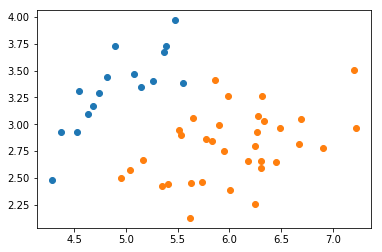

In [9]:
X_rand, y_rand = gmm.sample(50) # 混合正規分布からランダムに10個のサンプルを生成
X_rand0, y_rand0 = X_rand[y_rand==0], y_rand[y_rand==0]
X_rand1, y_rand1 = X_rand[y_rand==1], y_rand[y_rand==1]
plt.figure()
plt.plot(X_rand0[:, 0], X_rand0[:, 1], 'o')
plt.plot(X_rand1[:, 0], X_rand1[:, 1], 'o')
plt.show()

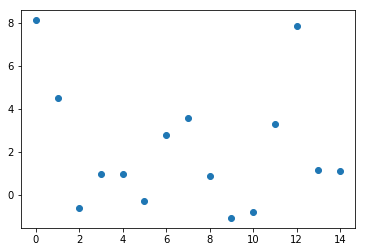

In [10]:
anom = -gmm.score_samples(X_test) # 各サンプルの自己エントロピー
plt.figure()
plt.plot(range(len(anom)), anom, 'o')
plt.show()